In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.signal import find_peaks

In [92]:
data_path = os.path.join(
    '/home',
    'gabriel',
    'code',
    'aim-training-data',
    'data',
    '1',
    'served',
    'data.csv'
)

In [93]:
df = pd.read_csv(data_path).drop(columns=['Unnamed: 0'])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Task_ID                1381 non-null   int64  
 1   User_ID                1381 non-null   int64  
 2   Frame                  1381 non-null   int64  
 3   FPS                    1381 non-null   int64  
 4   Datetime               1381 non-null   object 
 5   Video_Width            1381 non-null   int64  
 6   Video_Height           1381 non-null   int64  
 7   Center_X               1340 non-null   float64
 8   Center_Y               1340 non-null   float64
 9   Box_X                  1340 non-null   float64
 10  Box_Y                  1340 non-null   float64
 11  Box_Width              1340 non-null   float64
 12  Box_Height             1340 non-null   float64
 13  hit                    1381 non-null   bool   
 14  Center_Speed_X         1338 non-null   float64
 15  Cent

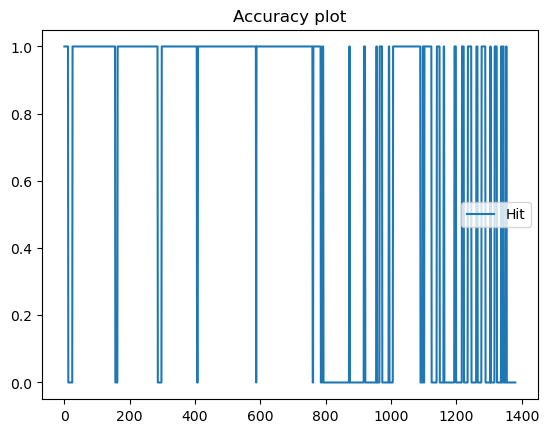

In [95]:
plt.title('Accuracy plot')
plt.plot(df['hit'], label='Hit')
plt.legend()

In [96]:
accurary = df['hit'].value_counts()[True]/len(df['hit'])
print(f"Accuracy = {accurary}")

Accuracy = 0.6813902968863143


In [97]:
counter = 0
times = []
for i, row in df.iterrows():
    if row['hit'] == False:
        counter += 1
    if row['hit'] == True:
        counter = 0
    times.append(counter)
df['miss_count'] = times
times.append(0)
times = np.array(times)

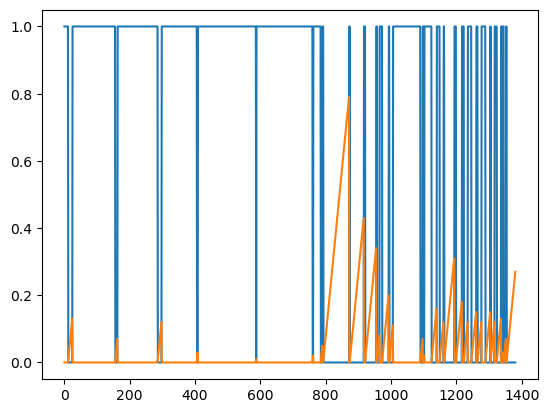

In [98]:
plt.plot(df['hit'])
plt.plot(df['miss_count']/100)

In [99]:
peaks_idx, _ = find_peaks(times)
peaks_idx

array([  24,  162,  297,  408,  587,  761,  789,  871,  916,  954,  964,
        992, 1005, 1096, 1101, 1139, 1160, 1193, 1216, 1234, 1260, 1276,
       1303, 1316, 1336, 1341, 1351, 1380])

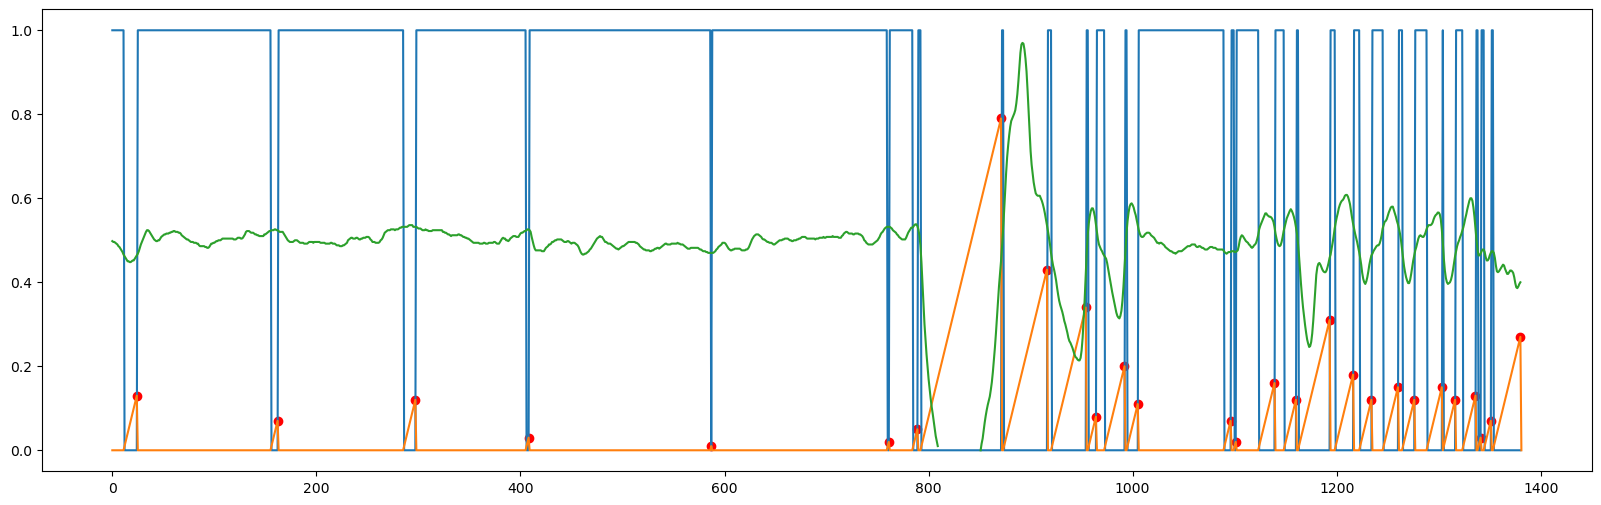

In [100]:
plt.figure(figsize=(20, 6))
plt.plot(df['hit'])
plt.plot(times/100)
plt.scatter(peaks_idx, times[peaks_idx]/100, c='r')
plt.plot(df['Center_X']/500)

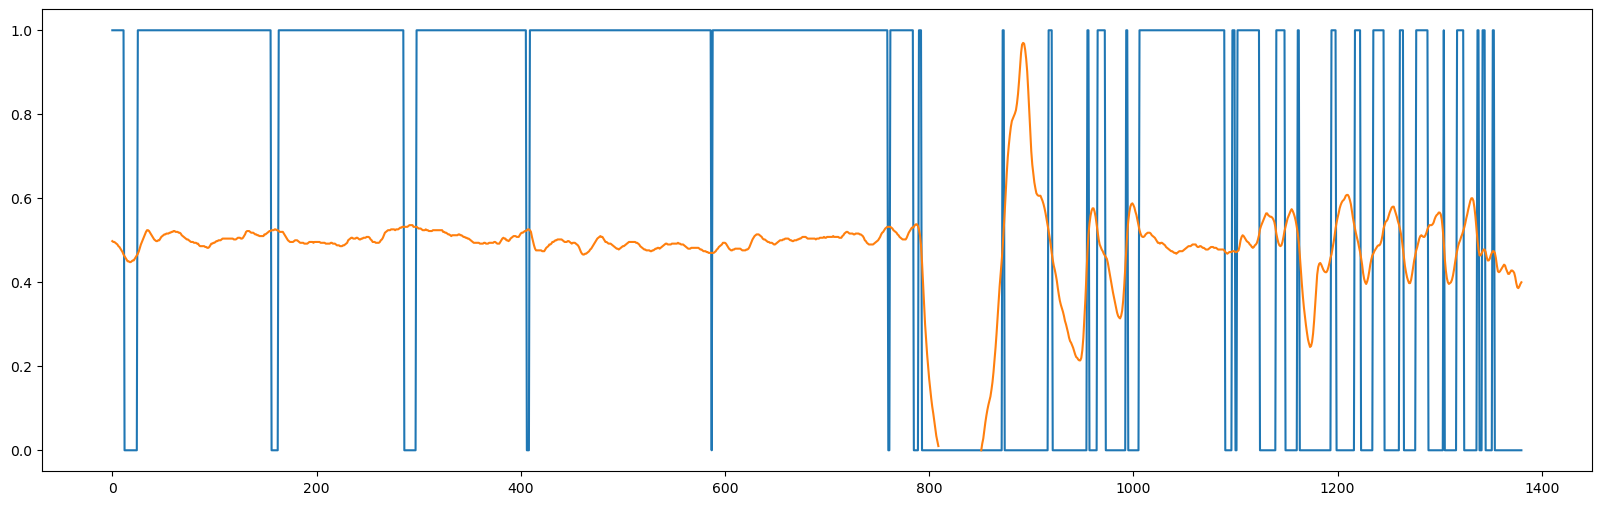

In [113]:
plt.figure(figsize=(20, 6))
plt.plot(df['hit'])
plt.plot(df['Center_X']/500)

In [101]:
beggining = df[:len(df)//3].index
middle = df[len(df)//3:(2*len(df))//3].index
end = df[(2*len(df))//3:].index

### KPIs

1) Accuracy at each step
2) Max duration missing at each step (time to return hitting)
3) {Avg, max} speed while missing
4) {Avg, max} acc while missing
5) Number of changes in direction while missing
6) Number of changes in hit column at each step

In [102]:
# Simple percentage of hits at each step

beggining_accuracy = df.iloc[beggining]['hit'].value_counts()[True]/len(df.iloc[beggining])
middle_accuracy = df.iloc[middle]['hit'].value_counts()[True]/len(df.iloc[middle])
end_accuracy = df.iloc[end]['hit'].value_counts()[True]/len(df.iloc[end])

In [103]:
# Maximun number of sequential missed shots in each step

beggining_max_miss_time = df.iloc[beggining]['miss_count'].max()
middle_max_miss_time = df.iloc[middle]['miss_count'].max()
end_max_miss_time = df.iloc[end]['miss_count'].max()

In [104]:
# Avarage absolute speed while missing at each step 

beggining_miss_x_speed = df.iloc[beggining][df.iloc[beggining]['hit']==False]['Center_Speed_X']
beggining_miss_y_speed = df.iloc[beggining][df.iloc[beggining]['hit']==False]['Center_Speed_Y']
beggining_avg_miss_speed = ((beggining_miss_x_speed**2+beggining_miss_y_speed)**.5).mean()

middle_miss_x_speed = df.iloc[middle][df.iloc[middle]['hit']==False]['Center_Speed_X']
middle_miss_y_speed = df.iloc[middle][df.iloc[middle]['hit']==False]['Center_Speed_Y']
middle_avg_miss_speed = ((middle_miss_x_speed**2+middle_miss_y_speed)**.5).mean()

end_miss_x_speed = df.iloc[end][df.iloc[end]['hit']==False]['Center_Speed_X']
end_miss_y_speed = df.iloc[end][df.iloc[end]['hit']==False]['Center_Speed_Y']
end_avg_miss_speed = ((end_miss_x_speed**2+end_miss_y_speed)**.5).mean()

In [105]:
# Max absolute speed while missing at each step 

beggining_miss_x_speed = df.iloc[beggining][df.iloc[beggining]['hit']==False]['Center_Speed_X']
beggining_miss_y_speed = df.iloc[beggining][df.iloc[beggining]['hit']==False]['Center_Speed_Y']
beggining_max_miss_speed = ((beggining_miss_x_speed**2+beggining_miss_y_speed)**.5).max()

middle_miss_x_speed = df.iloc[middle][df.iloc[middle]['hit']==False]['Center_Speed_X']
middle_miss_y_speed = df.iloc[middle][df.iloc[middle]['hit']==False]['Center_Speed_Y']
middle_max_miss_speed = ((middle_miss_x_speed**2+middle_miss_y_speed)**.5).max()

end_miss_x_speed = df.iloc[end][df.iloc[end]['hit']==False]['Center_Speed_X']
end_miss_y_speed = df.iloc[end][df.iloc[end]['hit']==False]['Center_Speed_Y']
end_max_miss_speed = ((end_miss_x_speed**2+end_miss_y_speed)**.5).max()

In [106]:
# Avarage absolute acceleration while missing at each step

beggining_miss_x_acceleration = df.iloc[beggining][df.iloc[beggining]['hit']==False]['Center_Acceleration_X']
beggining_miss_y_acceleration = df.iloc[beggining][df.iloc[beggining]['hit']==False]['Center_Acceleration_Y']
beggining_avg_miss_acceleration = ((beggining_miss_x_acceleration**2+beggining_miss_y_acceleration)**.5).mean()

middle_miss_x_acceleration = df.iloc[middle][df.iloc[middle]['hit']==False]['Center_Acceleration_X']
middle_miss_y_acceleration = df.iloc[middle][df.iloc[middle]['hit']==False]['Center_Acceleration_Y']
middle_avg_miss_acceleration = ((middle_miss_x_acceleration**2+middle_miss_y_acceleration)**.5).mean()

end_miss_x_acceleration = df.iloc[end][df.iloc[end]['hit']==False]['Center_Acceleration_X']
end_miss_y_acceleration = df.iloc[end][df.iloc[end]['hit']==False]['Center_Acceleration_Y']
end_avg_miss_acceleration = ((end_miss_x_acceleration**2+end_miss_y_acceleration)**.5).mean()

In [107]:
# Max absolute acceleration while missing at each step

beggining_miss_x_acceleration = df.iloc[beggining][df.iloc[beggining]['hit']==False]['Center_Acceleration_X']
beggining_miss_y_acceleration = df.iloc[beggining][df.iloc[beggining]['hit']==False]['Center_Acceleration_Y']
beggining_max_miss_acceleration = ((beggining_miss_x_acceleration**2+beggining_miss_y_acceleration)**.5).max()

middle_miss_x_acceleration = df.iloc[middle][df.iloc[middle]['hit']==False]['Center_Acceleration_X']
middle_miss_y_acceleration = df.iloc[middle][df.iloc[middle]['hit']==False]['Center_Acceleration_Y']
middle_max_miss_acceleration = ((middle_miss_x_acceleration**2+middle_miss_y_acceleration)**.5).max()

end_miss_x_acceleration = df.iloc[end][df.iloc[end]['hit']==False]['Center_Acceleration_X']
end_miss_y_acceleration = df.iloc[end][df.iloc[end]['hit']==False]['Center_Acceleration_Y']
end_max_miss_acceleration = ((end_miss_x_acceleration**2+end_miss_y_acceleration)**.5).max()

In [108]:
# Number of changes in direction in each axis while missing for each step 

beggining_x_speed_signs = np.sign(df.iloc[beggining][df.iloc[beggining]['hit']==False]['Center_Speed_X'])
beggining_x_speed_sign_changes = (beggining_x_speed_signs.shift() != beggining_x_speed_signs) & (beggining_x_speed_signs != 0)
beggining_x_miss_direction_changes = beggining_x_speed_sign_changes.sum()

beggining_y_speed_signs = np.sign(df.iloc[beggining][df.iloc[beggining]['hit']==False]['Center_Speed_Y'])
beggining_y_speed_sign_changes = (beggining_y_speed_signs.shift() != beggining_y_speed_signs) & (beggining_y_speed_signs != 0)
beggining_y_miss_direction_changes = beggining_y_speed_sign_changes.sum()

middle_x_speed_signs = np.sign(df.iloc[middle][df.iloc[middle]['hit']==False]['Center_Speed_X'])
middle_x_speed_sign_changes = (middle_x_speed_signs.shift() != middle_x_speed_signs) & (middle_x_speed_signs != 0)
middle_x_miss_direction_changes = middle_x_speed_sign_changes.sum()

middle_y_speed_signs = np.sign(df.iloc[middle][df.iloc[middle]['hit']==False]['Center_Speed_Y'])
middle_y_speed_sign_changes = (middle_y_speed_signs.shift() != middle_y_speed_signs) & (middle_y_speed_signs != 0)
middle_y_miss_direction_changes = middle_y_speed_sign_changes.sum()

end_x_speed_signs = np.sign(df.iloc[end][df.iloc[end]['hit']==False]['Center_Speed_X'])
end_x_speed_sign_changes = (end_x_speed_signs.shift() != end_x_speed_signs) & (end_x_speed_signs != 0)
end_x_miss_direction_changes = end_x_speed_sign_changes.sum()

end_y_speed_signs = np.sign(df.iloc[end][df.iloc[end]['hit']==False]['Center_Speed_Y'])
end_y_speed_sign_changes = (end_y_speed_signs.shift() != end_y_speed_signs) & (end_y_speed_signs != 0)
end_y_miss_direction_changes = end_y_speed_sign_changes.sum()

In [109]:
# Number of times the target was missed (hit_to_miss) and reached again (miss_to_hit) in each step

beggining_hit_to_miss = df.iloc[beggining]['hit']
beggining_hit_to_miss_value_changes = ((beggining_hit_to_miss.shift() == True) & (beggining_hit_to_miss == False)).sum()
beggining_hit_to_miss_num_changes = beggining_hit_to_miss_value_changes.sum() - 1

beggining_miss_to_hit = df.iloc[beggining]['hit']
beggining_miss_to_hit_value_changes = ((beggining_miss_to_hit.shift() == False) & (beggining_miss_to_hit == True)).sum()
beggining_miss_to_hit_num_changes = beggining_miss_to_hit_value_changes.sum() - 1

middle_hit_to_miss = df.iloc[middle]['hit']
middle_hit_to_miss_value_changes = ((middle_hit_to_miss.shift() == True) & (middle_hit_to_miss == False)).sum()
middle_hit_to_miss_num_changes = middle_hit_to_miss_value_changes.sum() - 1

middle_miss_to_hit = df.iloc[middle]['hit']
middle_miss_to_hit_value_changes = ((middle_miss_to_hit.shift() == False) & (middle_miss_to_hit == True)).sum()
middle_miss_to_hit_num_changes = middle_miss_to_hit_value_changes.sum() - 1

end_hit_to_miss = df.iloc[end]['hit']
end_hit_to_miss_value_changes = ((end_hit_to_miss.shift() == True) & (end_hit_to_miss == False)).sum()
end_hit_to_miss_num_changes = end_hit_to_miss_value_changes.sum() - 1

end_miss_to_hit = df.iloc[end]['hit']
end_miss_to_hit_value_changes = ((end_miss_to_hit.shift() == False) & (end_miss_to_hit == True)).sum()
end_miss_to_hit_num_changes = end_miss_to_hit_value_changes.sum() - 1

In [110]:
columns = [
    'step',
    'accuracy',
    'max_miss_time',
    'avg_miss_speed',
    'max_miss_speed',
    'avg_miss_acceleration',
    'max_miss_acceleration',
    'x_miss_direction_changes',
    'y_miss_direction_changes',
    'hit_to_miss_num_changes',
    'miss_to_hit_num_changes'
]

beggining_kpis = (
    'beggining',
    beggining_accuracy,
    beggining_max_miss_time,
    beggining_avg_miss_speed,
    beggining_max_miss_speed,
    beggining_avg_miss_acceleration,
    beggining_max_miss_acceleration,
    beggining_x_miss_direction_changes,
    beggining_y_miss_direction_changes,
    beggining_hit_to_miss_num_changes,
    beggining_miss_to_hit_num_changes
)

middle_kpis = (
    'middle',
    middle_accuracy,
    middle_max_miss_time,
    middle_avg_miss_speed,
    middle_max_miss_speed,
    middle_avg_miss_acceleration,
    middle_max_miss_acceleration,
    middle_x_miss_direction_changes,
    middle_y_miss_direction_changes,
    middle_hit_to_miss_num_changes,
    middle_miss_to_hit_num_changes
)

end_kpis = (
    'end',
    end_accuracy,
    end_max_miss_time,
    end_avg_miss_speed,
    end_max_miss_speed,
    end_avg_miss_acceleration,
    end_max_miss_acceleration,
    end_x_miss_direction_changes,
    end_y_miss_direction_changes,
    end_hit_to_miss_num_changes,
    end_miss_to_hit_num_changes
)

kpis_df = pd.DataFrame([
    beggining_kpis,
    middle_kpis,
    end_kpis
], columns = columns)

<Axes: >

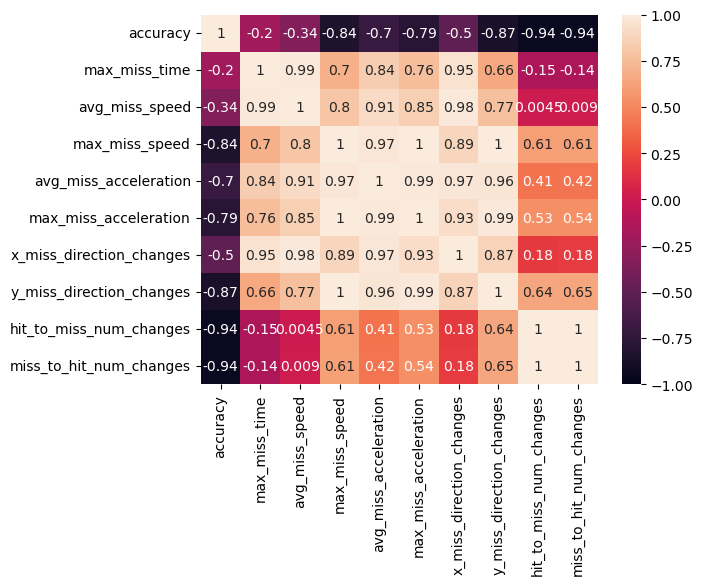

In [111]:
sns.heatmap(kpis_df.select_dtypes(exclude=["object"]).corr(), annot=True, vmin=-1, vmax=1)